In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
spring_19 = pd.read_excel('League of Legends/2019-spring-match-data-OraclesElixir-2019-05-21.xlsx')
summer_19 = pd.read_excel('League of Legends/2019-summer-match-data-OraclesElixir-2019-09-16.xlsx')
lcs_19 = spring_19.append(summer_19)
worlds_19 = pd.read_excel('League of Legends/2019-summer-match-data-OraclesElixir-2019-11-10.xlsx')
print('Done.')

Done.


In [4]:

team_stats = lcs_19.groupby('team').mean()
region_stats = lcs_19.groupby('league').mean()

In [5]:
player_stats = lcs_19.groupby('player').mean()
player_stats['kda'] = (player_stats['k'] + player_stats['a']) / player_stats['d']
individual_performance = ['kda']

In [6]:
#player_stats['kda']

In [7]:
# gold efficiency (dmg to champions / gold earned)

gold_damage = ['player', 'team', 'league', 'position', 'dmgtochampsperminute', 'earnedgpm']
gd = lcs_19[gold_damage]
gd['gold_efficiency'] = gd['dmgtochampsperminute'] / gd['earnedgpm']

<ipython-input-7-190f03c0f97d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gd['gold_efficiency'] = gd['dmgtochampsperminute'] / gd['earnedgpm']


In [8]:
# what players are most gold efficient (do the most dmg per gold earned)?

player_gd = gd.groupby('player').mean()
player_gd.dropna().sort_values(by='gold_efficiency', ascending=False).head(10)

,dmgtochampsperminute,earnedgpm,gold_efficiency
player,,,
Scarlet,665.423901,250.548610,2.623405
Hauz,511.946669,188.213008,2.550073
RooKie,616.898523,274.219819,2.282623
Froggen,587.371586,259.565658,2.244320
MagiFelix,670.356247,300.170998,2.233248
Vahvel,174.145910,82.954780,2.214687
TitaN,636.240571,290.903787,2.202831
Moonblack,482.814283,223.811498,2.143042
tockers,546.705792,261.688631,2.108678


In [9]:
# what teams are most gold efficient (do the most dmg per gold earned)?
team_gd = gd.groupby('team').mean()
team_gd.dropna().sort_values(by='gold_efficiency', ascending=False).head(10)

,dmgtochampsperminute,earnedgpm,gold_efficiency
team,,,
Fenerbahce Esports,748.721773,414.645751,1.741725
Dragon Gate Team,605.133385,350.405415,1.707737
Bombers,659.049967,377.212432,1.706902
Invictus Gaming,734.778467,427.971642,1.697538
Cloud9,670.121824,394.485770,1.696554
CNB,590.841606,351.037682,1.668400
Redemption eSports,620.334118,370.979770,1.653629
KaBuM e-Sports,641.193414,377.022333,1.650769
Golden Guardians,626.177380,370.164525,1.642098


In [10]:
# what regions are most gold efficient (do the most dmg per gold earned)?

league_gd = gd.groupby('league').mean()
league_gd.dropna().sort_values(by='gold_efficiency', ascending=False).head(10)

,dmgtochampsperminute,earnedgpm,gold_efficiency
league,,,
LCS,598.195485,372.789795,1.561518
CBLoL,596.764330,379.162106,1.549361
MSI,607.535815,388.070706,1.534823
LEC,598.005930,386.296141,1.523939
LMS,583.030814,376.167195,1.514267
LCK,551.859994,380.102838,1.416509


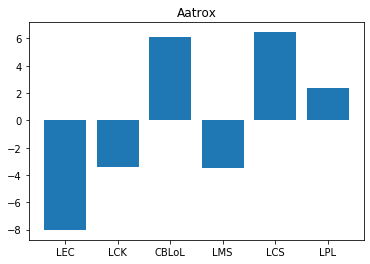

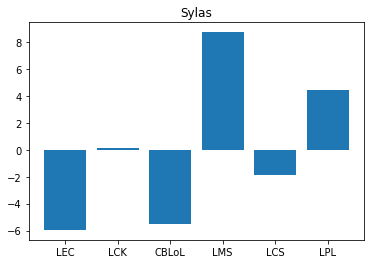

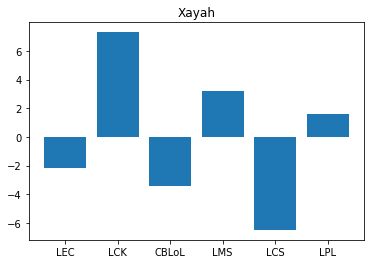

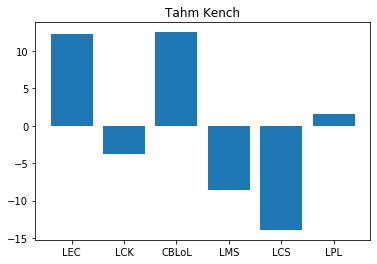

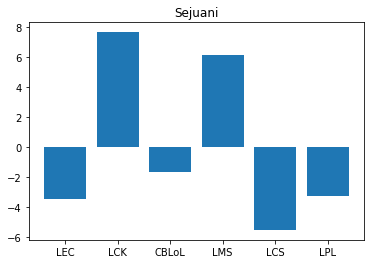

In [16]:
#python pandas code for champ winrates across regions
# A look at what regions perform above the average winrate 
# on what champions.

top5a = spring_19['champion'].value_counts()[:6].index[1:]
top5b = summer_19['champion'].value_counts()[:6].index[1:]
leagues = spring_19['league'].unique()
leagues = leagues[:-1]
split = summer_19
best = top5b
champ_dict = {}
for champ in best:
    wr = {}
    all = []
    for lol in leagues:
        league = split[split['league'] == lol]
        champ_games = league[league['champion']==champ]
        winrate = champ_games['result'].mean()
        all.append(winrate)
        avg = np.mean(np.array(all))
    for lol in leagues:
        league = split[split['league'] == lol]
        champ_games = league[league['champion']==champ]
        winrate = champ_games['result'].mean()
        wr[lol] = (winrate - avg) * 100
    champ_dict[champ] = wr
for champ in best:
    d = champ_dict[champ]
    plt.figure()
    plt.bar(d.keys(), d.values())
    plt.title(champ)    


In [15]:
#reg_pos = gd.groupby('player').mean()[['league', 'position']]
#player_gd['dpg'] = player_gd['dmgtochampsperminute'] / player_gd['earnedgpm']
#player_gd = player_gd.join(reg_pos).drop('Team')
#dmean = player_gd['dmgtochampsperminute'].mean() 
#gmean = player_gd['earnedgpm'].mean()
#gmin = player_gd['earnedgpm'].min()
#gmax = player_gd['earnedgpm'].max()

#slope = dmean / gmean
#d= player_gd
#useful filter player_gd[player_gd['position'].isin(['ADC'])][player_gd['league'].isin(['LCK', 'LPL', 'LCS', 'LEC'])
#g=sns.pairplot(data=player_gd, hue='position', y_vars='dmgtochampsperminute', x_vars='earnedgpm');
#low, high = int(d['earnedgpm'].min()), int(d['earnedgpm'].max())
#sns.lineplot(x=[i for i in range(low, high)], y=[i*slope for i in range(low, high)])
#g.fig.set_size_inches(8,4);

#lck = player_gd[player_gd['league']=='LCK']
#lcs = player_gd[player_gd['league']=='LCS']
#lec = player_gd[player_gd['league']=='LEC']
#lpl = player_gd[player_gd['league']=='LPL']
#gold_damage = ['player', 'league', 'position', 'dmgtochampsperminute', 'earnedgpm']
#gd = worlds_19[gold_damage]
#reg_pos = gd.groupby('player').max()[['league', 'position']]
#player_gd = gd.groupby('player').mean()
#player_gd['dpg'] = player_gd['dmgtochampsperminute'] / player_gd['earnedgpm']
#player_gd = player_gd.join(reg_pos).drop('Team')